In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla
import qutip

In [2]:
def tp(x, y):
    return qutip.tensor(x, y)

# Operators.
σx = qutip.Qobj([[0,1],[1,0]])
σy = qutip.Qobj([[0,-1j],[1j,0]])
σz = qutip.Qobj([[1,0],[0,-1]])
ide = qutip.Qobj(np.eye(2))
σp = (σx + 1j * σy)/2
σm = σp.dag()

# Model parameters.
ωA = 1.
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 0.1
g = 0

# Simulation parameters.
number_trajectories = 500
dt = 0.01
t_final = 50

H = ωA * tp(σz, ide) + ωB * tp(ide, σz) + ΩA * tp(σx, ide) + ΩB * tp(ide, σx) + g * (tp(σp, σm) + tp(σm, σp))

M = np.sqrt(γ) * tp(ide, σm)
M_l = [M]

num_op_B = qutip.Qobj([[0,0],[0,1]])
num_op_B_overall = tp(ide, num_op_B)

ψ0 = tp(qutip.Qobj([[1],[0]]), qutip.Qobj([[1],[0]]))

t_range = np.arange(0, t_final, dt)

In [3]:
result = qutip.mcsolve(H, ψ0, t_range, M_l, [], ntraj=number_trajectories)
print("Concluded")

10.0%. Run time:   1.12s. Est. time left: 00:00:00:10
20.0%. Run time:   2.31s. Est. time left: 00:00:00:09
30.0%. Run time:   3.24s. Est. time left: 00:00:00:07
40.0%. Run time:   4.08s. Est. time left: 00:00:00:06
50.0%. Run time:   4.94s. Est. time left: 00:00:00:04
60.0%. Run time:   5.82s. Est. time left: 00:00:00:03
70.0%. Run time:   6.75s. Est. time left: 00:00:00:02
80.0%. Run time:   7.67s. Est. time left: 00:00:00:01
90.0%. Run time:   8.50s. Est. time left: 00:00:00:00
100.0%. Run time:   9.34s. Est. time left: 00:00:00:00
Total run time:   9.36s
Concluded


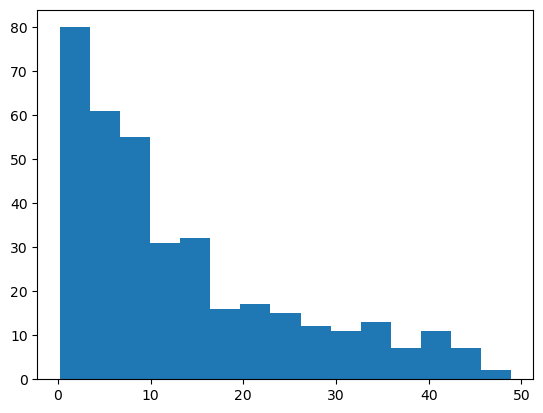

In [4]:
# Builds the plot of the waiting time distribution.
v_wtd = []
for trajectory in range(number_trajectories):
    for j in range(1, len(result.col_times[trajectory])):
        difference = result.col_times[trajectory][j] - result.col_times[trajectory][j-1]
        v_wtd.append(difference)
        
# print(v_wtd)
plt.hist(v_wtd, bins=15)
plt.show()

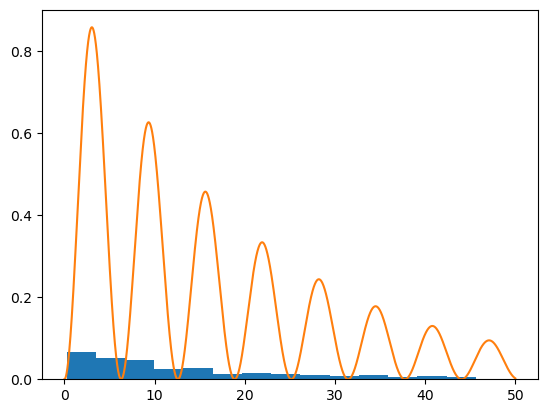